# Islamophobia in America (2008-2020)

### 1. Loading Packages

In [339]:
import pandas as pd #library for data manipulation and analysis
import numpy as np #numerical python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 2. Loading Data and Basic Analysis

In [340]:
data = pd.read_csv("public_conditions_master.csv")
dfislam = data.copy()

#### Basic Structure


In [341]:
dfislam.shape

(1947, 14)

In [342]:
dfislam.head()

,Item #,Latitude,Longitude,Zip_Code,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Description,Event Class,Gender of Victim(s),Source,Permanent URL
0,1,40.728007,-73.795853,11366,NY,New York,2016.0,2016-08-13T00:00:00,Homicide,"Alauddin Akonjee, an Imam in Queens, New York,...",crimes against people,male,NaN,NaN
1,2,25.740529,-80.222168,33133,FL,Florida,2016.0,2016-08-03T00:00:00,Airport Discrimination,"Niala Mohammad, a journalist for Voice of Amer...",bias-related incident (targeting individual or...,female,NaN,NaN
2,3,43.644026,-79.365234,NaN,ON,Ontario,2016.0,2016-01-18T00:00:00,Airport Discrimination,"Shan Anand, Faimul Alam, W.H., and M.K., four ...",bias-related incident (targeting individual or...,male,NaN,NaN
3,4,28.536275,-81.381912,32801,FL,Florida,2016.0,2016-09-11T00:00:00,Vandalism,A fire destroys the Islamic Center of Fort Pie...,crimes against property,male and female,NaN,NaN
4,5,42.759113,-71.466064,3060,NH,New Hampshire,2016.0,2016-09-11T00:00:00,Vandalism,An unknown suspect or suspects throws three ro...,crimes against property,male and female,NaN,NaN


In [343]:
dfislam.dtypes

Item #                   int64
Latitude               float64
Longitude               object
Zip_Code                object
State Abbrv.            object
State                   object
Year                   float64
TimeStamp               object
Event (short name)      object
Event Description       object
Event Class             object
Gender of Victim(s)     object
Source                  object
Permanent URL           object
dtype: object

In [344]:
dfislam.describe(include='all')

,Item #,Latitude,Longitude,Zip_Code,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Description,Event Class,Gender of Victim(s),Source,Permanent URL
count,1947.000000,1521.000000,1521,1519,1522,1522,1522.000000,1521,1522,1521,1522,1522,1517,162
unique,NaN,NaN,1472,1067,51,51,NaN,1071,28,1519,6,3,1457,160
top,NaN,NaN,-96.02584,78701,NY,New York,NaN,2015-11-16T00:00:00,Vandalism,"Shan Anand, Faimul Alam, W.H., and M.K., four ...",bias-related incident (targeting individual or...,male and female,http://www.chicagotribune.com/news/nationworld...,https://web.archive.org/web/20190726171341/htt...
freq,NaN,NaN,4,11,175,175,NaN,25,200,2,590,1024,19,2
mean,990.061633,38.486931,NaN,NaN,NaN,NaN,2015.429041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,566.258980,5.053280,NaN,NaN,NaN,NaN,2.798849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,25.658993,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,502.500000,34.536156,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,991.000000,39.486124,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1480.500000,41.887295,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Completeness

In [345]:
dfislam.isnull().sum()

Item #                    0
Latitude                426
Longitude               426
Zip_Code                428
State Abbrv.            425
State                   425
Year                    425
TimeStamp               426
Event (short name)      425
Event Description       426
Event Class             425
Gender of Victim(s)     425
Source                  430
Permanent URL          1785
dtype: int64

### 3. Dropping Unnecessary Columns

In [346]:
drop_columns = ['Latitude','Longitude','Zip_Code','Permanent URL','Source']
dfislam.drop(drop_columns, axis=1, inplace=True)
dfislam

,Item #,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Description,Event Class,Gender of Victim(s)
0,1,NY,New York,2016.0,2016-08-13T00:00:00,Homicide,"Alauddin Akonjee, an Imam in Queens, New York,...",crimes against people,male
1,2,FL,Florida,2016.0,2016-08-03T00:00:00,Airport Discrimination,"Niala Mohammad, a journalist for Voice of Amer...",bias-related incident (targeting individual or...,female
2,3,ON,Ontario,2016.0,2016-01-18T00:00:00,Airport Discrimination,"Shan Anand, Faimul Alam, W.H., and M.K., four ...",bias-related incident (targeting individual or...,male
3,4,FL,Florida,2016.0,2016-09-11T00:00:00,Vandalism,A fire destroys the Islamic Center of Fort Pie...,crimes against property,male and female
4,5,NH,New Hampshire,2016.0,2016-09-11T00:00:00,Vandalism,An unknown suspect or suspects throws three ro...,crimes against property,male and female
...,...,...,...,...,...,...,...,...,...
1942,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Dropping the rows containing null values

In [347]:
dfislam.dropna(inplace=True)
dfislam

,Item #,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Description,Event Class,Gender of Victim(s)
0,1,NY,New York,2016.0,2016-08-13T00:00:00,Homicide,"Alauddin Akonjee, an Imam in Queens, New York,...",crimes against people,male
1,2,FL,Florida,2016.0,2016-08-03T00:00:00,Airport Discrimination,"Niala Mohammad, a journalist for Voice of Amer...",bias-related incident (targeting individual or...,female
2,3,ON,Ontario,2016.0,2016-01-18T00:00:00,Airport Discrimination,"Shan Anand, Faimul Alam, W.H., and M.K., four ...",bias-related incident (targeting individual or...,male
3,4,FL,Florida,2016.0,2016-09-11T00:00:00,Vandalism,A fire destroys the Islamic Center of Fort Pie...,crimes against property,male and female
4,5,NH,New Hampshire,2016.0,2016-09-11T00:00:00,Vandalism,An unknown suspect or suspects throws three ro...,crimes against property,male and female
...,...,...,...,...,...,...,...,...,...
1517,1538,GA,Georgia,2020.0,2020-06-17T00:00:00,Hate Speech,Videos of Georgia US House candidate with ties...,public speech (political figures),male and female
1518,1539,IN,Indiana,2020.0,2019-12-26T00:00:00,Emloyment Discrimination,"E'Lon Brown, a Muslim man, is wrongfully termi...",bias-related incident (targeting individual or...,male
1519,1540,MI,Michigan,2020.0,2020-07-10T00:00:00,Vandalism,"The Al Ihsaan Islamic Center in Warren, MI is ...",crimes against property,male and female
1520,1541,MO,Missouri,2020.0,2020-07-16T00:00:00,Harassment,"Rania Barakat, a Muslim woman, was turned away...",bias-related incident (targeting individual or...,female


### 5. Converting Year column from float to int

In [348]:
dfislam['Year']=dfislam['Year'].astype(int)


In [349]:
dfislam['TimeStamp'].unique

<bound method Series.unique of 0       2016-08-13T00:00:00
1       2016-08-03T00:00:00
2       2016-01-18T00:00:00
3       2016-09-11T00:00:00
4       2016-09-11T00:00:00
               ...         
1517    2020-06-17T00:00:00
1518    2019-12-26T00:00:00
1519    2020-07-10T00:00:00
1520    2020-07-16T00:00:00
1521    2020-07-17T00:00:00
Name: TimeStamp, Length: 1521, dtype: object>

As the time is missing from the timestamp we will only keep the date part.

In [350]:
dfislam['TimeStamp']=pd.to_datetime(dfislam['TimeStamp']) 
dfislam

,Item #,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Description,Event Class,Gender of Victim(s)
0,1,NY,New York,2016,2016-08-13,Homicide,"Alauddin Akonjee, an Imam in Queens, New York,...",crimes against people,male
1,2,FL,Florida,2016,2016-08-03,Airport Discrimination,"Niala Mohammad, a journalist for Voice of Amer...",bias-related incident (targeting individual or...,female
2,3,ON,Ontario,2016,2016-01-18,Airport Discrimination,"Shan Anand, Faimul Alam, W.H., and M.K., four ...",bias-related incident (targeting individual or...,male
3,4,FL,Florida,2016,2016-09-11,Vandalism,A fire destroys the Islamic Center of Fort Pie...,crimes against property,male and female
4,5,NH,New Hampshire,2016,2016-09-11,Vandalism,An unknown suspect or suspects throws three ro...,crimes against property,male and female
...,...,...,...,...,...,...,...,...,...
1517,1538,GA,Georgia,2020,2020-06-17,Hate Speech,Videos of Georgia US House candidate with ties...,public speech (political figures),male and female
1518,1539,IN,Indiana,2020,2019-12-26,Emloyment Discrimination,"E'Lon Brown, a Muslim man, is wrongfully termi...",bias-related incident (targeting individual or...,male
1519,1540,MI,Michigan,2020,2020-07-10,Vandalism,"The Al Ihsaan Islamic Center in Warren, MI is ...",crimes against property,male and female
1520,1541,MO,Missouri,2020,2020-07-16,Harassment,"Rania Barakat, a Muslim woman, was turned away...",bias-related incident (targeting individual or...,female


Counting unique values for each column

In [351]:
dfislam.nunique()

Item #                 1521
State Abbrv.             51
State                    51
Year                     13
TimeStamp              1071
Event (short name)       28
Event Description      1519
Event Class               6
Gender of Victim(s)       3
dtype: int64

In [352]:
dfislam['Event (short name)'].value_counts()

Vandalism                     200
Harassment                    172
Violent Threat                172
Public Campaign               149
Violent Incident              104
Legislative Discrimination     92
National Political Speech      77
Political Speech               70
Employment Discrimination      70
Education Discrimination       64
Assault                        61
Anti-Mosque Campaign           60
Hate Speech                    50
Airport Discrimination         37
Arson                          24
Detention Discrimination       20
Burglary                       20
Homicide                       16
Emloyment Discrimination       12
Political Appointment          10
Attempted Homicide             10
Qur'an Desecration              9
Anti-Cemetery Campaign          9
Executive Order                 6
Land-Use Discrimination         4
Presidential Election           1
Travel Ban                      1
vandalism                       1
Name: Event (short name), dtype: int64

In [363]:
dfislam.drop(dfislam[dfislam["Event (short name)"]=='vandalism'].index)

,Item #,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Description,Event Class,Gender of Victim(s)
0,1,NY,New York,2016,2016-08-13,Homicide,"Alauddin Akonjee, an Imam in Queens, New York,...",crimes against people,male
1,2,FL,Florida,2016,2016-08-03,Airport Discrimination,"Niala Mohammad, a journalist for Voice of Amer...",bias-related incident (targeting individual or...,female
2,3,ON,Ontario,2016,2016-01-18,Airport Discrimination,"Shan Anand, Faimul Alam, W.H., and M.K., four ...",bias-related incident (targeting individual or...,male
3,4,FL,Florida,2016,2016-09-11,Vandalism,A fire destroys the Islamic Center of Fort Pie...,crimes against property,male and female
4,5,NH,New Hampshire,2016,2016-09-11,Vandalism,An unknown suspect or suspects throws three ro...,crimes against property,male and female
...,...,...,...,...,...,...,...,...,...
1517,1538,GA,Georgia,2020,2020-06-17,Hate Speech,Videos of Georgia US House candidate with ties...,public speech (political figures),male and female
1518,1539,IN,Indiana,2020,2019-12-26,Emloyment Discrimination,"E'Lon Brown, a Muslim man, is wrongfully termi...",bias-related incident (targeting individual or...,male
1519,1540,MI,Michigan,2020,2020-07-10,Vandalism,"The Al Ihsaan Islamic Center in Warren, MI is ...",crimes against property,male and female
1520,1541,MO,Missouri,2020,2020-07-16,Harassment,"Rania Barakat, a Muslim woman, was turned away...",bias-related incident (targeting individual or...,female


In [354]:
dfislam['Event (short name)'].value_counts()

Vandalism                     200
Harassment                    172
Violent Threat                172
Public Campaign               149
Violent Incident              104
Legislative Discrimination     92
National Political Speech      77
Political Speech               70
Employment Discrimination      70
Education Discrimination       64
Assault                        61
Anti-Mosque Campaign           60
Hate Speech                    50
Airport Discrimination         37
Arson                          24
Detention Discrimination       20
Burglary                       20
Homicide                       16
Emloyment Discrimination       12
Political Appointment          10
Attempted Homicide             10
Qur'an Desecration              9
Anti-Cemetery Campaign          9
Executive Order                 6
Land-Use Discrimination         4
Presidential Election           1
Travel Ban                      1
vandalism                       1
Name: Event (short name), dtype: int64

### 6. Exploration

<AxesSubplot:xlabel='Year', ylabel='count'>

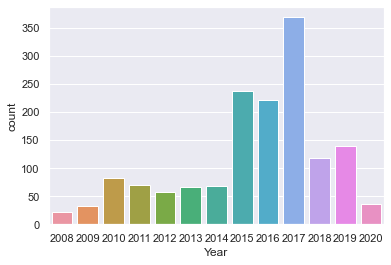

In [355]:
sns.countplot(x='Year',data=dfislam)

Analysis: Islamophobia attacks reached their peak in 2017.

<AxesSubplot:xlabel='Year', ylabel='count'>

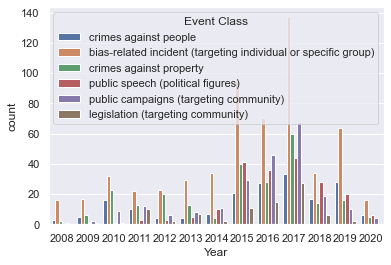

In [356]:
sns.countplot(x='Year', hue='Event Class', data=dfislam)

Analysis: Majority of the islamophobic events were bias-related incidents.

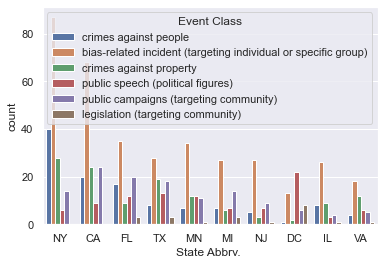

In [357]:
sns.countplot(x='State Abbrv. ', hue='Event Class', data=dfislam, order=pd.value_counts(dfislam['State Abbrv. ']).iloc[:10].index);

Analysis: Newyork and California have reported the highest islamophobia events.

Text(0, 0.5, 'Incident Type')

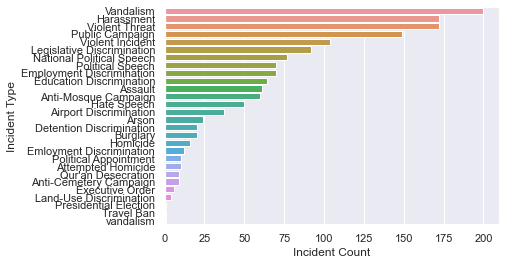

In [358]:
ax=sns.countplot(y='Event (short name)',data=dfislam, linewidth=1, order=dfislam['Event (short name)'].value_counts().index)
ax.set_xlabel('Incident Count')
ax.set_ylabel('Incident Type')

In [359]:
Analysis: Vandalism is the most commonly occuring incident. Followed by harrassment.

SyntaxError: invalid syntax (2954013340.py, line 1)

In [ ]:
sns.histplot(binwidth=5, y="Event (short name)", hue="Gender of Victim(s)", data=dfislam, stat="count", multiple="stack")

Analysis: Highest involvement of women is in harrassment related incidents. Highest involvement of men is in violent incidents. 

## Conclusion

Islamophobia reached its peak in the US in 2017 and has been declining ever since. The top states are Newyork and California with highest racial incidents against muslims. While both muslim men and women were affected by these incidents, the harrassment cases were majority against women while violent incidents were majorly committed against muslim men.